In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec



In [93]:
df = pd.read_csv('../data/final_dfs/combined_final.csv')
df.head()

,date,Biomass,Coal,Hydro,Nuclear,Other,Solar,Wind,NGas
0,2011-01-01,1240.848016,304483.8981,670.712237,90516.91023,357.449324,70.651290,123213.38820,248086.36399
1,2011-01-02,1478.590690,320703.6726,667.009668,90462.21494,372.626928,10.255158,62531.39844,268971.64998
2,2011-01-03,1483.246127,296436.2237,741.426017,90472.37075,401.536782,15.155827,89515.57352,222285.00985
3,2011-01-04,1411.010006,322214.6377,683.281626,90312.68708,478.415477,5.278214,59542.48570,271747.93685
4,2011-01-05,1348.331266,308136.0801,623.145421,90280.19160,440.383112,22.997359,128920.84250,358001.80005


In [94]:
df['date']=pd.to_datetime(df['date'])
df['Date'] = df['date']
df.drop(columns='Other', inplace=True)

In [95]:
df.set_index('date', inplace=True)

In [96]:
df['total'] = df.sum(axis=1)

In [97]:
df['year'] = df['Date'].dt.year

In [98]:
df

,Biomass,Coal,Hydro,Nuclear,Solar,Wind,NGas,Date,total,year
date,,,,,,,,,,
2011-01-01,1240.848016,304483.898100,670.712237,90516.910230,70.651290,123213.388200,248086.363990,2011-01-01,7.682828e+05,2011
2011-01-02,1478.590690,320703.672600,667.009668,90462.214940,10.255158,62531.398440,268971.649980,2011-01-02,7.448248e+05,2011
2011-01-03,1483.246127,296436.223700,741.426017,90472.370750,15.155827,89515.573520,222285.009850,2011-01-03,7.009490e+05,2011
2011-01-04,1411.010006,322214.637700,683.281626,90312.687080,5.278214,59542.485700,271747.936850,2011-01-04,7.459173e+05,2011
2011-01-05,1348.331266,308136.080100,623.145421,90280.191600,22.997359,128920.842500,358001.800050,2011-01-05,8.873334e+05,2011
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,635.255371,184407.678785,500.494667,122762.954790,29820.239198,321323.147861,194637.587100,2020-12-27,8.540874e+05,2020
2020-12-28,591.302614,193621.421107,636.269588,122720.408975,19924.960198,350947.810220,216475.798107,2020-12-28,9.049180e+05,2020
2020-12-29,667.202987,144900.104532,643.995831,122664.769337,11594.382815,443182.060206,167954.504264,2020-12-29,8.916070e+05,2020


<AxesSubplot:xlabel='year', ylabel='NGas'>

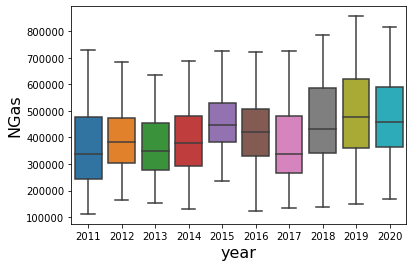

In [118]:
sns.boxplot(x=df['year'], y=df['NGas'])


<AxesSubplot:xlabel='year', ylabel='Wind'>

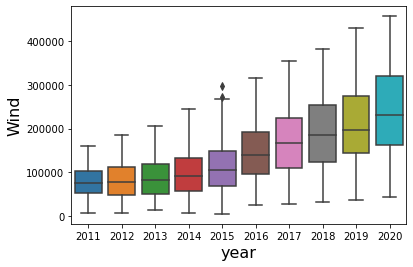

In [119]:
sns.boxplot(x=df['year'], y=df['Wind'])


<AxesSubplot:xlabel='year', ylabel='Solar'>

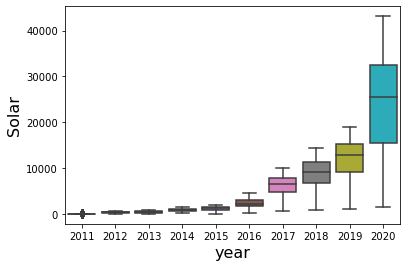

In [122]:
sns.boxplot(x=df['year'], y=df['Solar'])

<AxesSubplot:xlabel='year', ylabel='Nuclear'>

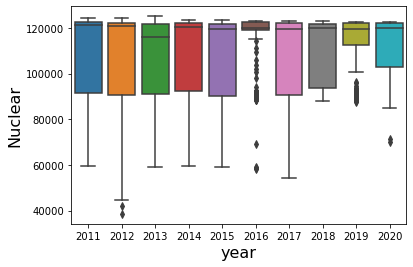

In [121]:
sns.boxplot(x=df['year'], y=df['Nuclear'])

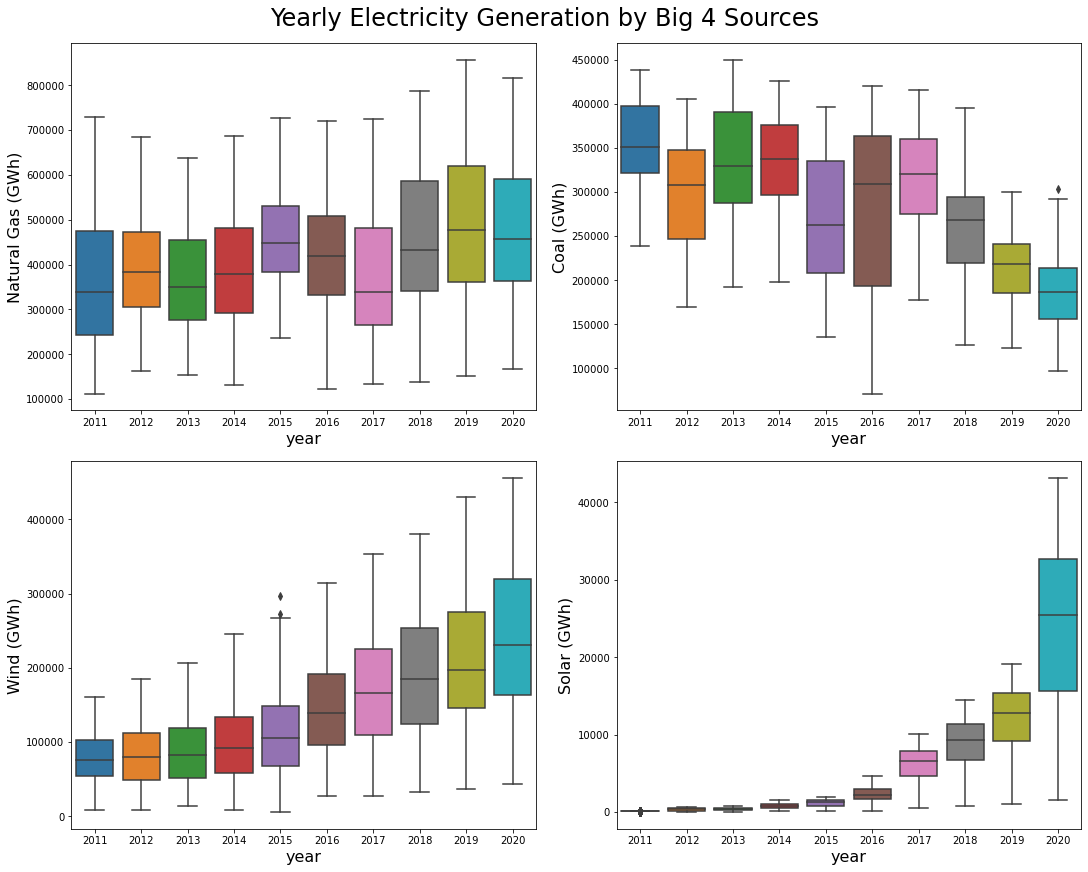

In [153]:

# fig.set_figheight(12)
# fig.set_figwidth(9)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12), constrained_layout=True)

fig.suptitle('Yearly Electricity Generation by Big 4 Sources', va='top', fontsize=24)

sns.boxplot(ax = axes[0, 0], data=df, x='year', y='NGas');
axes[0,0].set_ylabel('Natural Gas (GWh)');
sns.boxplot(ax = axes[0, 1], data=df, x='year', y='Coal');
axes[0,1].set_ylabel('Coal (GWh)');
sns.boxplot(ax = axes[1, 0], data=df, x='year', y='Wind');
axes[1,0].set_ylabel('Wind (GWh)');
sns.boxplot(ax = axes[1, 1], data=df, x='year', y='Solar');
axes[1,1].set_ylabel('Solar (GWh)');

In [40]:
df_percent = pd.DataFrame(columns=['Date', 'Biomass', 'Coal', 'Hydro', 'Nuclear', 'Solar', 'Wind', 'NGas'])

In [41]:
df_percent['Biomass'] = df['Biomass'] / df['total']
df_percent['Coal'] = df['Coal'] / df['total']
df_percent['Hydro'] = df['Hydro'] / df['total']
df_percent['Nuclear'] = df['Nuclear'] / df['total']
df_percent['Solar'] = df['Solar'] / df['total']
df_percent['Wind'] = df['Wind'] / df['total']
df_percent['NGas'] = df['NGas'] / df['total']

In [42]:
df_percent

,Date,Biomass,Coal,Hydro,Nuclear,Solar,Wind,NGas
date,,,,,,,,
2011-01-01,NaN,0.001615,0.396317,0.000873,0.117817,0.000092,0.160375,0.322910
2011-01-02,NaN,0.001985,0.430576,0.000896,0.121454,0.000014,0.083955,0.361121
2011-01-03,NaN,0.002116,0.422907,0.001058,0.129071,0.000022,0.127706,0.317120
2011-01-04,NaN,0.001892,0.431971,0.000916,0.121076,0.000007,0.079825,0.364314
2011-01-05,NaN,0.001520,0.347261,0.000702,0.101743,0.000026,0.145290,0.403458
...,...,...,...,...,...,...,...,...
2020-12-27,NaN,0.000744,0.215912,0.000586,0.143736,0.034915,0.376218,0.227890
2020-12-28,NaN,0.000653,0.213966,0.000703,0.135615,0.022019,0.387823,0.239221
2020-12-29,NaN,0.000748,0.162516,0.000722,0.137577,0.013004,0.497060,0.188373


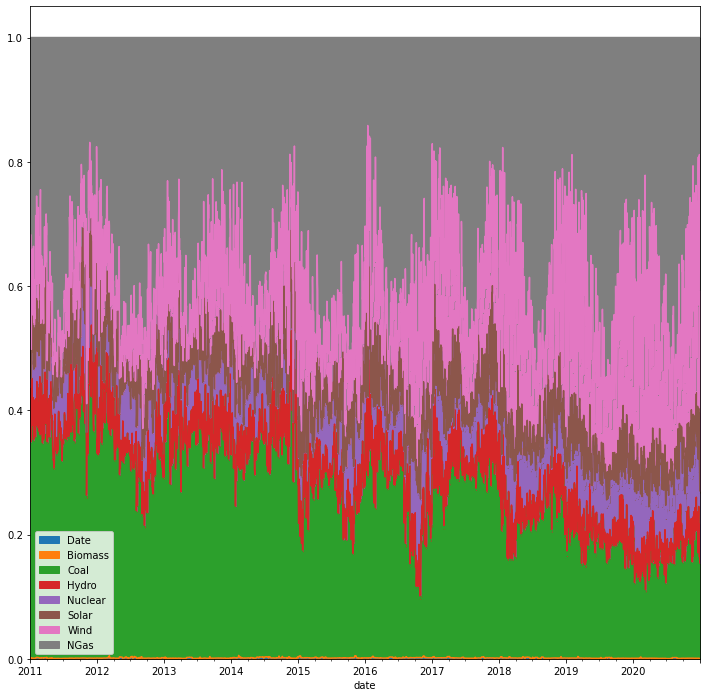

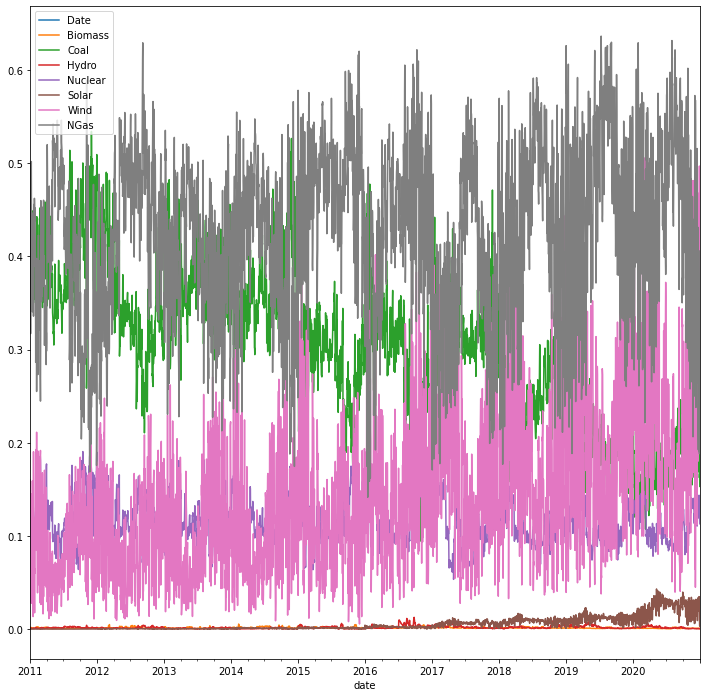

In [49]:
df_percent.plot.area(figsize=(12,12));
df_percent.plot(figsize=(12,12));

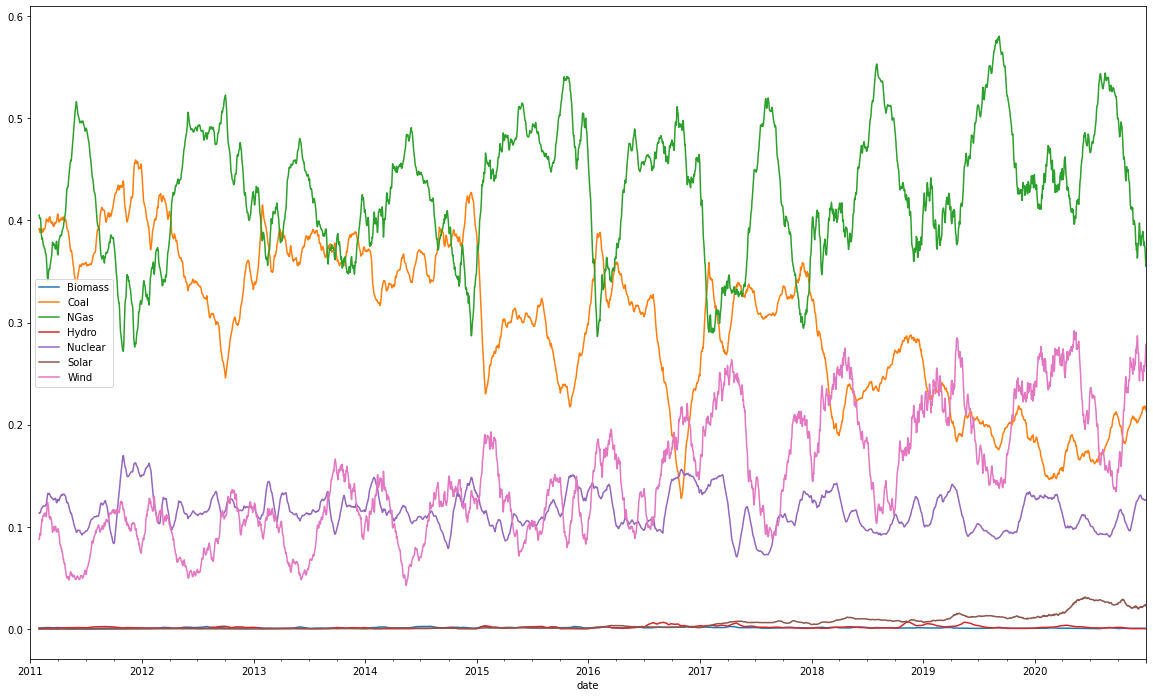

In [55]:
plt.figure(figsize=(20,12))

df_percent.rolling(30)['Biomass'].mean().plot(kind='line')
df_percent.rolling(30)['Coal'].mean().plot(kind='line')
df_percent.rolling(30)['NGas'].mean().plot(kind='line')
df_percent.rolling(30)['Hydro'].mean().plot(kind='line')
df_percent.rolling(30)['Nuclear'].mean().plot(kind='line')
df_percent.rolling(30)['Solar'].mean().plot(kind='line')
df_percent.rolling(30)['Wind'].mean().plot(kind='line')

plt.legend(['Biomass', 'Coal', 'NGas', 'Hydro', 'Nuclear', 'Solar', 'Wind'], loc='best')

In [61]:
decomposition = seasonal_decompose(df['NGas'],model='additive')
decomposition.plot(figsize=(12,12));
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

TypeError: plot() got an unexpected keyword argument 'figsize'

In [63]:
df['NGas'].groupy

date
2011-01-01    248086.363990
2011-01-02    268971.649980
2011-01-03    222285.009850
2011-01-04    271747.936850
2011-01-05    358001.800050
                  ...      
2020-12-27    194637.587100
2020-12-28    216475.798107
2020-12-29    167954.504264
2020-12-30    227983.660971
2020-12-31    439845.363552
Name: NGas, Length: 3653, dtype: float64